In [1]:
from google.colab import files
uploaded = files.upload()

Saving column_3C.csv to column_3C (2).csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_paths = ['/content/column_3C.csv', '/content/dados_torneamento.xlsx']

# Prompt the user to choose a file
print('Please choose a dataset to load:')
for i, file_path in enumerate(file_paths):
    print(f'{i+1}. {file_path}')

selection = int(input()) - 1
selected_file_path = file_paths[selection]

if selection == 0:
  dados = pd.read_csv(selected_file_path, delimiter=',')
elif selection == 1:
  dados = pd.read_excel(selected_file_path)

Please choose a dataset to load:
1. /content/column_3C.csv
2. /content/dados_torneamento.xlsx
1


In [3]:
dados

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


**Execute o código abaixo caso escolha o dataset coluna vertebral**

In [8]:
from sklearn.preprocessing import LabelEncoder

X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
min_max= MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 16  # Choose the number of nodes in the hidden layer >>>> 2 coluna >>>>> 32
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)

# Training the neural network using gradient descent
epochs = 100  # Choose the number of epochs to train for

for i in range(epochs):
    # Forward propagation for the training set
    input_layer_size = X_train.shape[1]
    hidden_layer_size = 16
    output_layer_size = y_onehot.shape[1]

  # Calculating the hidden layer output matrix for training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    H_train = a1_train

  # Calculating the output weight matrix using pseudo-inverse
    beta = np.dot(np.linalg.pinv(H_train), y_train)

  # Predicting the outputs for training set
    y_hat_train = np.dot(H_train, beta)

accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    H_train = a1_train

# Calculating the hidden layer output matrix for test set
    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    H_test = a1_test

# Calculating the output weight matrix using pseudo-inverse
    beta = np.dot(np.linalg.pinv(H_train), y_train)

# Predicting the outputs for training set
    y_hat_train = np.dot(H_train, beta)

# Predicting the outputs for test set
    y_hat_test = np.dot(H_test, beta)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

**Execute o código abaixo caso escolha o dataset torneamento**



In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 100
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)

# Training the neural network using gradient descent
epochs = 10000  # Choose the number of epochs to train for
for i in range(epochs):
    # Forward propagation for the training set
    input_layer_size = X_train.shape[1]
    hidden_layer_size = 16
    output_layer_size = y_onehot.shape[1]

  # Calculating the hidden layer output matrix for training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    H_train = a1_train

  # Calculating the output weight matrix using pseudo-inverse
    beta = np.dot(np.linalg.pinv(H_train), y_train)

accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    H_train = a1_train

    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    H_test = a1_test

    # Predicting the outputs for training set
    y_hat_train = np.dot(H_train, beta)

    # Predicting the outputs for test set
    y_hat_test = np.dot(H_test, beta)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

In [9]:
y_pred_test = np.argmax(y_hat_test, axis=1)

    # Calculate the actual labels
y_actual_test = np.argmax(y_test, axis=1)

for j in range(len(y_pred_test)):
    output_label = (np.array([y_pred_test[j]]))[0]
    actual_label = (np.array([y_actual_test[j]]))[0]
    print(f"Sample {j+1}: Predicted Label = {output_label}, Actual Label = {actual_label}")

Sample 1: Predicted Label = 1, Actual Label = 0
Sample 2: Predicted Label = 1, Actual Label = 1
Sample 3: Predicted Label = 2, Actual Label = 2
Sample 4: Predicted Label = 2, Actual Label = 2
Sample 5: Predicted Label = 1, Actual Label = 1
Sample 6: Predicted Label = 2, Actual Label = 2
Sample 7: Predicted Label = 2, Actual Label = 2
Sample 8: Predicted Label = 2, Actual Label = 2
Sample 9: Predicted Label = 2, Actual Label = 2
Sample 10: Predicted Label = 2, Actual Label = 2
Sample 11: Predicted Label = 1, Actual Label = 1
Sample 12: Predicted Label = 2, Actual Label = 2
Sample 13: Predicted Label = 0, Actual Label = 1
Sample 14: Predicted Label = 0, Actual Label = 0
Sample 15: Predicted Label = 2, Actual Label = 2
Sample 16: Predicted Label = 2, Actual Label = 2
Sample 17: Predicted Label = 1, Actual Label = 0
Sample 18: Predicted Label = 2, Actual Label = 2
Sample 19: Predicted Label = 0, Actual Label = 2
Sample 20: Predicted Label = 2, Actual Label = 2
Sample 21: Predicted Label = 

**Avaliar resultados de accuracia**

In [10]:
accuracy_mean_train = np.mean(accuracy_values_train)
accuracy_mean_test = np.mean(accuracy_values_test)
accuracy_std_train = np.std(accuracy_values_train)
accuracy_std_test = np.std(accuracy_values_test)


df_results = pd.DataFrame({
      'Accuracy Mean': [accuracy_mean_train, accuracy_mean_test],
      'Accuracy Std': [accuracy_std_train, accuracy_std_test]
}, index=['Train', 'Test'])

df_results

,Accuracy Mean,Accuracy Std
Train,0.847339,0.011519
Test,0.834194,0.045396


In [11]:
cm_train_sum = np.sum(cm_train_list, axis=0)
cm_test_sum = np.sum(cm_test_list, axis=0)

**Matriz de confusão coluna vertebral**

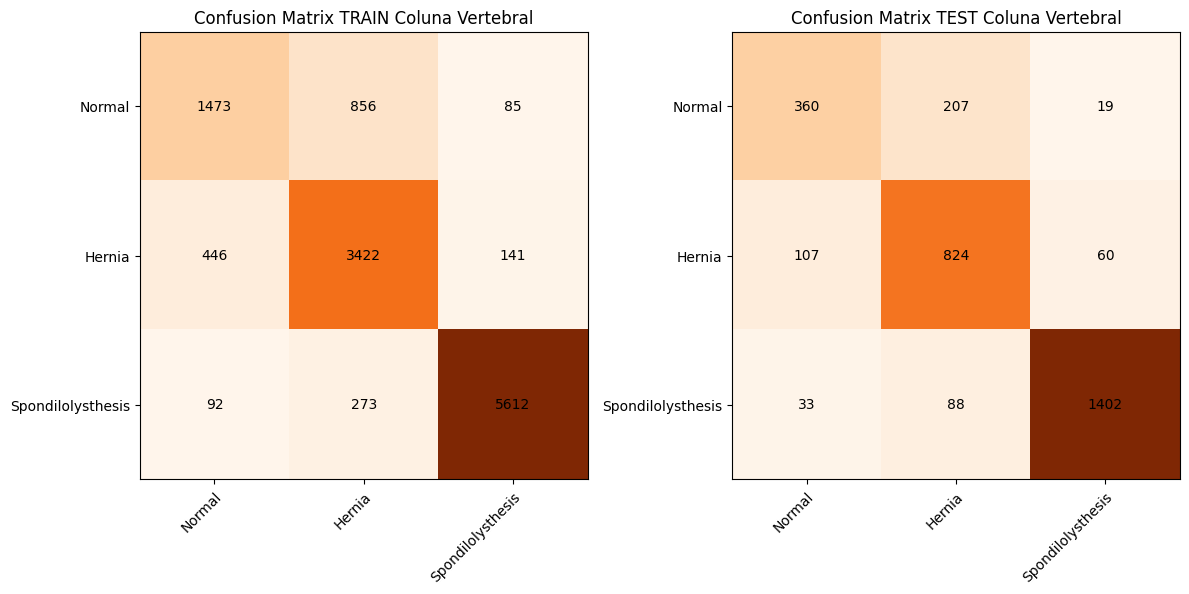

In [12]:
target_names = ['Normal', 'Hernia', 'Spondilolysthesis']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Coluna Vertebral")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Coluna Vertebral")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()

**Matriz de confusão torneamento**




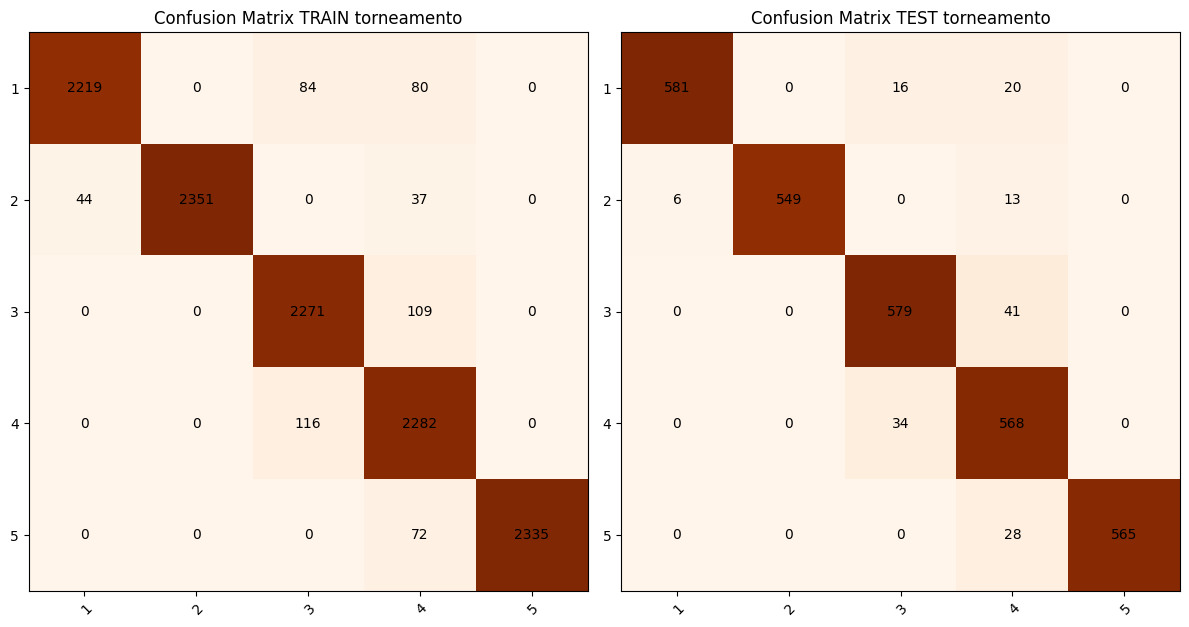

In [7]:
target_names = ['1','2','3','4','5']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN torneamento")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST torneamento")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()